# Transforma da Fourier Quântica

In [33]:
import numpy as np

from qiskit import *
from qiskit.visualization import plot_bloch_multivector

In [86]:
# Criação de um estado |j> = |j1j2j3..jn> da base computacional a partir do estado |000..0>

def configuracao_qubits(circuit, j):
    num_qubits = circuit.num_qubits
    bin_j = bin(j)[2:]

    bin_j = "0" * (num_qubits - len(bin_j)) + bin_j
#     bin_j = bin_j[::-1]

    for i, qb in enumerate(bin_j):
        if qb == '1':
            circuit.x(i)

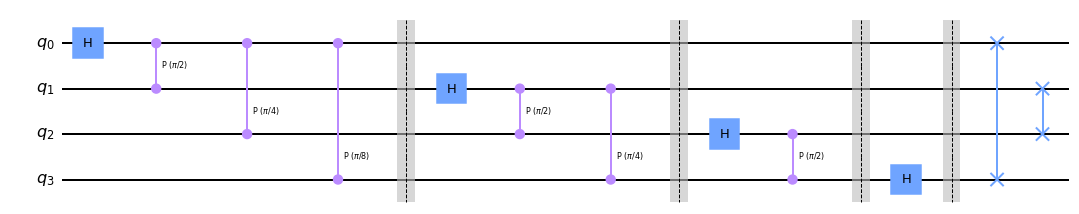

In [113]:
# Porta que implementa a transformada de Fourier Quântica

def QFT(n, show_barrier=False):
    qft_circuit = QuantumCircuit(n)

    for i in range(n):
        qft_circuit.h(i)
        k = 2
        for j in range(i+1, n):
            qft_circuit.cp(2 * np.pi/ 2 ** k, j, i)
            k += 1
            
        if show_barrier:
            qft_circuit.barrier()

    for i in range(n // 2):
        qft_circuit.swap(i, n - 1 - i)
    
    
    return qft_circuit

QFT(4, True).draw('mpl')

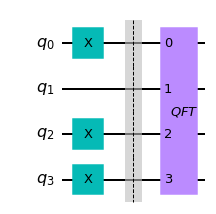

In [123]:
# Circuito que aplica a QFT em um estado inicial |j>

n = 4
ket_j = 11 # estado inicial

Uqft = QFT(n).to_gate(label=r"$QFT$") # Criação da Porta que implementa QFT


qc = QuantumCircuit(n)

configuracao_qubits(qc, ket_j)

qc.barrier()

qc.append(Uqft, range(n))

qc.draw('mpl')

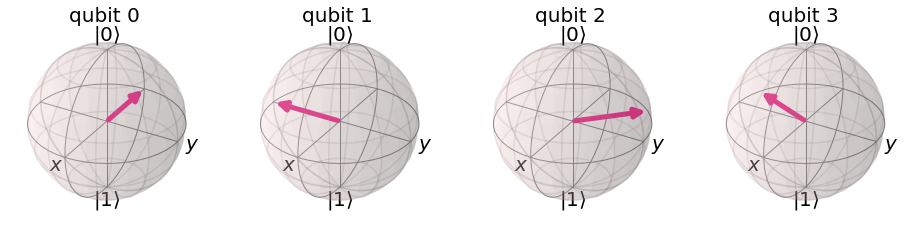

In [124]:
# Execução do Circuito

svsim = Aer.get_backend('statevector_simulator')

result = execute(qc, backend = svsim, shots=1).result()
svector = result.get_statevector()

plot_bloch_multivector(svector)

## Transformada de Fourier Inversa

In [125]:
# Porta que implementa a transformada de Fourier Quântica Inversa

def QFTdgr(n, show_barrier=False):
    qft_circuit = QuantumCircuit(n)
    
    for i in range(n // 2 - 1, -1, -1):
        qft_circuit.swap(i, n - 1 - i)
        
    for i in range(n-1, -1, -1):
        
        k = n - i
        
        if show_barrier:
            qft_circuit.barrier()
        
        for j in range(n-1, i, -1):
            qft_circuit.cp(-2 * np.pi/ 2 ** k, j, i)
            k -= 1
        qft_circuit.h(i)
               
    
    return qft_circuit

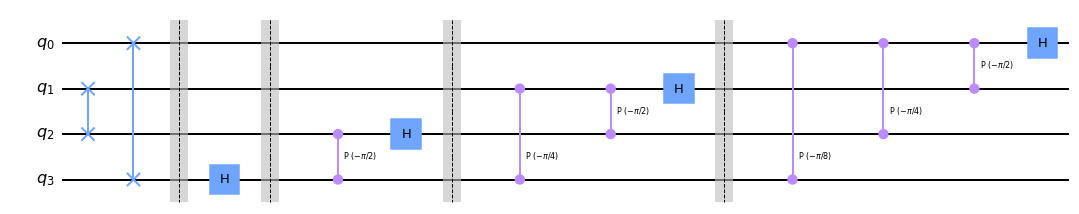

In [112]:
QFTdgr(4, True).draw('mpl')

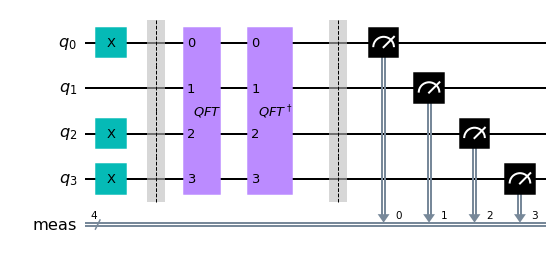

In [126]:
Uqft_dgr = QFTdgr(n).to_gate(label=r"${QFT}^\dagger$") # Criação da Porta que implementa QFT^\dagger


qc.append(Uqft_dgr, range(n))

qc.measure_all()

qc.draw('mpl')

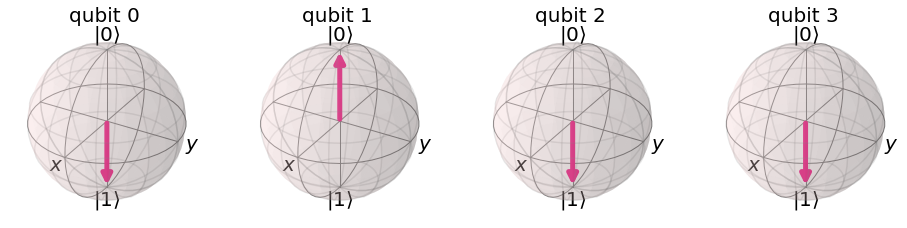

In [132]:
# Execução do circuito

svsim = Aer.get_backend('statevector_simulator')

result = execute(qc, backend = svsim, shots=1).result()
svector = result.get_statevector()

plot_bloch_multivector(svector)

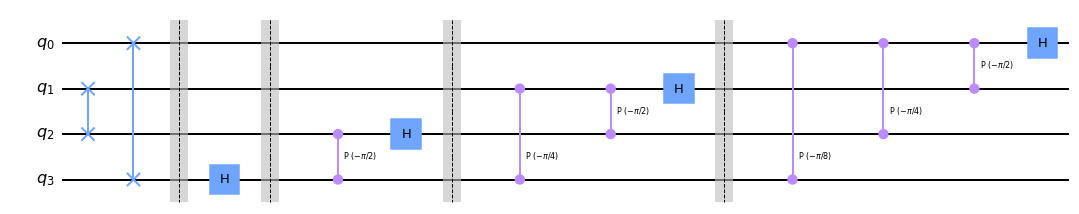

In [131]:
# No qiskit há um método que retorna o inverso de um circuito: circuit.inverse()

inverse_QFT = QFT(4, True).inverse()
inverse_QFT.draw('mpl')